In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./data') if isfile(join('./data', f))]

In [6]:
# Index in farfield arrays for 8 degrees
# 8 degrees from normal = pi/2 - 0.1396
# What fraction of pi : 
ind = np.radians(90-8) / np.pi * 1000
ind

455.55555555555554

In [10]:
90 - np.degrees(np.angle(np.cos(np.pi*(ind/1000)) + 1j*np.sin(np.pi*(ind/1000))))

8.0

So pick 456

In [26]:
periods = []
FFs = []
S11s = []
wav_0 = []
wav_1 = []
farfield_powers = []
Prs = []
Pnorms = []

for file in onlyfiles:
    dbfile = open('./data/' + file, 'rb')
    db = pickle.load(dbfile)
    
    # Parameters
    params = db['params']
    periods.append(params['a'])
    FFs.append(params['FF'])
    
    # Waveguide port
    res_waveguide = db['res_waveguide']
    wav_0.append(res_waveguide.alpha[0,0,0])
    wav_1.append(res_waveguide.alpha[0,0,1])
    S11s.append(np.abs(res_waveguide.alpha[0,0,1])**2/np.abs(res_waveguide.alpha[0,0,0])**2)
    
    # Far field at 8 degrees
    farfield_powers = db['farfield_power']
    
    Ex=farfield_powers[:,0]
    Ey=farfield_powers[:,1]
    Ez=farfield_powers[:,2]
    Hx=farfield_powers[:,3]
    Hy=farfield_powers[:,4]
    Hz=farfield_powers[:,5]
    Ex=np.conj(Ex)
    Ey=np.conj(Ey)
    Ez=np.conj(Ez)
    Px=np.real(np.multiply(Ey,Hz)-np.multiply(Ez,Hy))
    Py=np.real(np.multiply(Ez,Hx)-np.multiply(Ex,Hz))
    Pz=np.real(np.multiply(Ex,Hy)-np.multiply(Ey,Hx))
    Pr=np.sqrt(np.square(Px)+np.square(Py))
    Pnorm = Pr/np.max(Pr)
    
    Prs.append(Pr[int(ind)])
    Pnorms.append(Pnorm[int(ind)])
        
    dbfile.close()

In [27]:
import pandas as pd

dict_arr = {'period': periods, 
        'FF': FFs, 
        'S11': S11s, 
        'wav_0':wav_0,
        'wav_1':wav_1,
        'Prs':Prs,
        'Pnorms':Pnorms
       } 
df = pd.DataFrame(dict_arr)
df 

period    FF       S11               wav_0               wav_1       Prs  \
0      0.90  0.85  0.771901 -5.089420-3.949353j -4.208209-3.784781j  0.000032   
1      0.86  0.85  0.857577 -5.197399-3.928085j -5.982063-0.782881j  0.000009   
2      0.42  0.15  0.024793 -5.079165-3.912806j -0.184107-0.992617j  0.002332   
3      0.72  0.10  0.102782 -5.091659-3.942405j -1.070873-1.765035j  0.000226   
4      0.80  0.70  0.591475 -5.080178-3.848799j -1.002623-4.798055j  0.002456   
..      ...   ...       ...                 ...                 ...       ...   
581    0.68  0.60  0.100548 -5.075127-3.942963j  1.101987-1.714242j  0.002848   
582    0.86  0.70  0.086578 -5.080406-3.954634j  0.322511-1.866717j  0.004760   
583    0.20  0.15  0.186271 -5.140539-3.945589j -2.533673-1.184294j  0.000295   
584    0.62  0.80  0.137368 -5.056007-3.877390j -1.440582-1.871225j  0.000006   
585    0.22  0.45  0.820959 -5.138407-3.962944j -5.231407-2.683549j  0.000024   

       Pnorms  
0    0.002922  
1    0.001998  
2    0.035301  
3    0.005480  
4    0.223354  
..        ...  
581  0.035523  
582  0.055240  
583  0.060625  
584  0.000120  
585  0.145209  

[586 rows x 7 columns]

In [45]:
def neff(FF):
    return 1.93*FF + (1-FF)

def angle(a, neff):
    return np.degrees(neff - np.arcsin(0.635/a))

In [28]:
np.max(np.abs(df['Prs'].to_numpy()))

0.05317824837069842

In [29]:
df.loc[df['Prs'] == np.max(df['Prs'].to_numpy())]

period    FF      S11               wav_0               wav_1       Prs  \
47    0.84  0.75  0.10352 -5.095302-3.932398j -0.646255-1.967428j  0.053178   

     Pnorms  
47  0.54647

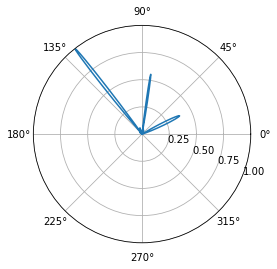

In [53]:
file = '06082021_05:55:59_a_0.8400_FF_0.7500_theta_0.0000_x_0.0000_source_1.0000_.pickle'

dbfile = open('./data/' + file, 'rb')
db = pickle.load(dbfile)
dbfile.close()

farfield_power = db['farfield_power']
farfield_angles = db['farfield_angles']

Ex=farfield_power[:,0]
Ey=farfield_power[:,1]
Ez=farfield_power[:,2]
Hx=farfield_power[:,3]
Hy=farfield_power[:,4]
Hz=farfield_power[:,5]
Ex=np.conj(Ex)
Ey=np.conj(Ey)
Ez=np.conj(Ez)
Px=np.real(np.multiply(Ey,Hz)-np.multiply(Ez,Hy))
Py=np.real(np.multiply(Ez,Hx)-np.multiply(Ex,Hz))
Pz=np.real(np.multiply(Ex,Hy)-np.multiply(Ey,Hx))
Pr=np.sqrt(np.square(Px)+np.square(Py))
Pnorm = Pr/np.max(Pr)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(farfield_angles, Pnorm)
ax.set_rmax(1)
ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [30]:
np.max(np.abs(df['Pnorms'].to_numpy()))

1.0

In [31]:
df.loc[df['Pnorms'] == np.max(df['Pnorms'].to_numpy())]

period    FF       S11               wav_0               wav_1       Prs  \
159    0.42  0.75  0.154005 -5.071028-3.904665j -0.776486-2.388596j  0.023828   

     Pnorms  
159     1.0

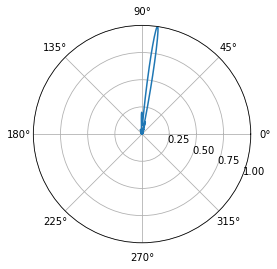

In [56]:
file = '06082021_03:48:05_a_0.4200_FF_0.7500_theta_0.0000_x_0.0000_source_1.0000_.pickle'

dbfile = open('./data/' + file, 'rb')
db = pickle.load(dbfile)
dbfile.close()

farfield_power = db['farfield_power']
farfield_angles = db['farfield_angles']

Ex=farfield_power[:,0]
Ey=farfield_power[:,1]
Ez=farfield_power[:,2]
Hx=farfield_power[:,3]
Hy=farfield_power[:,4]
Hz=farfield_power[:,5]
Ex=np.conj(Ex)
Ey=np.conj(Ey)
Ez=np.conj(Ez)
Px=np.real(np.multiply(Ey,Hz)-np.multiply(Ez,Hy))
Py=np.real(np.multiply(Ez,Hx)-np.multiply(Ex,Hz))
Pz=np.real(np.multiply(Ex,Hy)-np.multiply(Ey,Hx))
Pr=np.sqrt(np.square(Px)+np.square(Py))
Pnorm = Pr/np.max(Pr)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(farfield_angles, Pnorm)
ax.set_rmax(1)
ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [105]:
resolution = 32 # pixels/unit length (1 um)

hSiN = 0.44
hSiO2 = 3.2
hSi = 1
hair = 4

dgrat = 0.42 * 0.75
dgap = 0.42 * (1-0.75)
a = dgrat + dgap
N = 20
N = N+1
dtaper = 12

dbuffer = 0.5
dpml = 1

# Fiber parameters, from SMF-633-4/125-1-L or PMF-633-4/125-0.25-L
fiber_core = 4
fiber_clad = 120
fiber_angle = 8
fiber_angle = np.radians(fiber_angle)
fiber_xposition = 2
fiber_air_gap = 1
hfiber = 3
haircore = 2
hfiber_geom = 100 # Some large number to make fiber extend into PML
# Index from 0.10 @ 633 nm numerical aperture
# cladding 635 nm real index, From NA, n=1.4535642400664652
nClad = 1.4535642400664652
Clad = mp.Medium(index=nClad)
# Pure fused silica core core 635 nm real index (will be SiO2 below)

# MEEP's computational cell is always centered at (0,0), but code has beginning of grating at (0,0)
sxy = 2*dpml + dtaper + a*N + 2*dbuffer # sx here
sz = 2*dbuffer + hSiO2 + hSiN + hair + hSi + 2*dpml # sy here
comp_origin_x = dpml + dbuffer + dtaper
# comp_origin_x = 0
meep_origin_x = sxy/2
x_offset = meep_origin_x - comp_origin_x
# x_offset = 0
comp_origin_y = dpml + hSi + hSiO2 + hSiN/2
# comp_origin_y = 0
meep_origin_y = sz/2
y_offset = meep_origin_y - comp_origin_y
# y_offset = 0

x_offset_vector = mp.Vector3(x_offset,0)
offset_vector = mp.Vector3(x_offset, y_offset)
# offset_vector = mp.Vector3(0,0,0)

# Si3N4 635 nm real index
nSiN = 2.0102
SiN = mp.Medium(index=nSiN)
# SiO2 635 nm real index
nSiO2 = 1.4569
SiO2 = mp.Medium(index=nSiO2)
# Si substrate 635 nm complex index, following https://meep.readthedocs.io/en/latest/Materials/#conductivity-and-complex
# eps = 15.044 + i*0.14910
Si = mp.Medium(epsilon=15.044, D_conductivity=2*math.pi*0.635*0.14910/15.044)

# We will do x-z plane simulation
cell_size = mp.Vector3(sxy,sz)

geometry = []

# Fiber (defined first to be overridden)

# Core
# fiber_offset = mp.Vector3(fiber_xposition + extrax, hSiN/2 + hair + haircore + extray) - offset_vector
geometry.append(mp.Block(material=Clad, 
                         center=mp.Vector3(x=fiber_xposition) - offset_vector, 
                         size=mp.Vector3(fiber_clad, hfiber_geom),
                         e1=mp.Vector3(x=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                         e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                        )
               )
geometry.append(mp.Block(material=SiO2, 
                         center=mp.Vector3(x=fiber_xposition) - offset_vector, 
                         size=mp.Vector3(fiber_core, hfiber_geom),
                         e1=mp.Vector3(x=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                         e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                        )
               )

# air
geometry.append(mp.Block(material=mp.air, center=mp.Vector3(0,haircore/2)-offset_vector, size=mp.Vector3(mp.inf,haircore)))

# waveguide
geometry.append(mp.Block(material=SiN, center=mp.Vector3(0,0)-offset_vector, size=mp.Vector3(mp.inf,hSiN)))

# grating etch
for n in range(0,N):
    geometry.append(mp.Block(material=mp.air, center=mp.Vector3(n*a+dgap/2,0)-offset_vector, size=mp.Vector3(dgap,hSiN)))
    
geometry.append(mp.Block(material=mp.air, center=mp.Vector3(sxy-comp_origin_x-0.5*(dpml + dbuffer),0)-offset_vector, size=mp.Vector3(dpml + dbuffer,hSiN)))    

# BOX
geometry.append(mp.Block(material=SiO2, center=mp.Vector3(0,-0.5*(hSiN + hSiO2))-offset_vector, size=mp.Vector3(mp.inf,hSiO2)))

# Substrate
geometry.append(mp.Block(material=Si, center=mp.Vector3(0,-0.5*(hSiN + hSi + dpml + dbuffer) - hSiO2)-offset_vector, size=mp.Vector3(mp.inf,hSi+dpml+dbuffer)))

# PMLs
boundary_layers = [ mp.PML(dpml) ]

# Source 

# mode frequency
fcen = 1/0.635

waveguide_port_center = mp.Vector3(-1*dtaper,0)-offset_vector
waveguide_port_size = mp.Vector3(0,2*haircore-0.1)
fiber_port_center = mp.Vector3((0.5*sz-dpml+y_offset - 1)*np.sin(fiber_angle) + fiber_xposition, 0.5*sz-dpml+y_offset - 1)-offset_vector
fiber_port_size = mp.Vector3(sxy*3/5-2*dpml - 2,0)

# Waveguide source
# sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen, fwidth=0.1*fcen),
#                               size=waveguide_port_size,
#                               center=waveguide_port_center,
#                               eig_band=1,
#                               direction=mp.X,
#                               eig_match_freq=True,
#                               eig_parity=mp.ODD_Z)]

# Fiber source
sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen, fwidth=0.1*fcen),
                              size=fiber_port_size,
                              center=fiber_port_center,
                              eig_band=1,
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=mp.Vector3(y=-1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                              eig_match_freq=True,
                              eig_parity=mp.ODD_Z)]

#symmetries = [mp.Mirror(mp.Y,-1)]
symmetries = []

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    #geometry_center=mp.Vector3(x_offset, y_offset),
                    sources=sources,
                    dimensions=2,
                    symmetries=symmetries,
                    eps_averaging=False)

# Ports
waveguide_monitor_port = mp.ModeRegion(center=waveguide_port_center+mp.Vector3(x=0.2), size=waveguide_port_size)
waveguide_monitor = sim.add_mode_monitor(fcen, 0, 1, waveguide_monitor_port, yee_grid=True)
fiber_monitor_port = mp.ModeRegion(center=fiber_port_center-mp.Vector3(y=0.2), size=fiber_port_size, direction=mp.NO_DIRECTION)
fiber_monitor = sim.add_mode_monitor(fcen, 0, 1, fiber_monitor_port)

# nearfield = sim.add_near2far(fcen, 0, 1, mp.Near2FarRegion(mp.Vector3(x_offset,0.5*sz-dpml+y_offset)-offset_vector, size=mp.Vector3(sxy-2*dpml,0)))

In [106]:
%%capture
sim.init_sim()

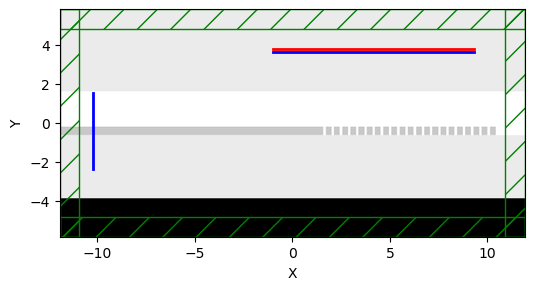

In [107]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [108]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate), until=100)
plt.close()

Meep progress: 26.28125/100.0 = 26.3% done in 4.0s, 11.2s to go
on time step 1682 (time=26.2812), 0.00237876 s/step
Meep progress: 58.078125/100.0 = 58.1% done in 8.0s, 5.8s to go
on time step 3717 (time=58.0781), 0.0019656 s/step
Meep progress: 90.0625/100.0 = 90.1% done in 12.0s, 1.3s to go
on time step 5764 (time=90.0625), 0.0019545 s/step
Normalizing field data...
run 0 finished at t = 100.0 (6400 timesteps)


In [109]:
animate.to_jshtml(10)

In [110]:
res_waveguide = sim.get_eigenmode_coefficients(waveguide_monitor,
                                         [1],
                                         eig_parity=mp.ODD_Z,
                                         direction=mp.X)

MPB solved for frequency_1(3.16567,0,0) = 1.63791 after 17 iters
MPB solved for frequency_1(3.03618,0,0) = 1.57482 after 9 iters
MPB solved for frequency_1(3.03613,0,0) = 1.5748 after 3 iters
Dominant planewave for band 1: (3.036134,-0.000000,0.000000)


In [111]:
print(res_waveguide.alpha[0,0,0], res_waveguide.alpha[0,0,1])

(-0.0005092031063024777-0.02236047429868361j) (-0.6327469984689437+0.3081773768510326j)


In [112]:
kpoint = mp.Vector3(y=-1).rotate(mp.Vector3(z=1), -1*fiber_angle)
res_fiber = sim.get_eigenmode_coefficients(fiber_monitor,
                                         [1],
                                         direction=mp.NO_DIRECTION,
                                         eig_parity=mp.ODD_Z,
                                         kpoint_func=lambda f,n: kpoint,
                                    )

MPB solved for frequency_1(-0.139173,-1.00983,0) = 0.687202 after 55 iters
MPB solved for frequency_1(-0.319005,-2.31467,0) = 1.57429 after 53 iters
MPB solved for frequency_1(-0.31911,-2.31543,0) = 1.5748 after 15 iters
MPB solved for frequency_1(-0.31911,-2.31543,0) = 1.5748 after 1 iters
Dominant planewave for band 1: (-0.319110,-2.270585,0.000000)


In [113]:
np.abs(res_waveguide.alpha[0,0,1])**2 / np.abs(res_fiber.alpha[0,0,0])**2

0.011960679846483491

In [77]:
res_fiber.alpha

array([[[-6.04936121+2.17302923j,  0.57430297-0.33772405j]]])

In [81]:
resolution = 32 # pixels/unit length (1 um)

hSiN = 0.44
hSiO2 = 3.2
hSi = 1
hair = 4

dgrat = 0.42 * 0.75
dgap = 0.42 * (1-0.75)
a = dgrat + dgap
N = 20
N = N+1
dtaper = 12

dbuffer = 0.5
dpml = 1

# Fiber parameters, from SMF-633-4/125-1-L or PMF-633-4/125-0.25-L
fiber_core = 4
fiber_clad = 120
fiber_angle = 8
fiber_angle = np.radians(fiber_angle)
fiber_xposition = 0
fiber_air_gap = 1
hfiber = 3
haircore = 2
hfiber_geom = 100 # Some large number to make fiber extend into PML
# Index from 0.10 @ 633 nm numerical aperture
# cladding 635 nm real index, From NA, n=1.4535642400664652
nClad = 1.4535642400664652
Clad = mp.Medium(index=nClad)
# Pure fused silica core core 635 nm real index (will be SiO2 below)

# MEEP's computational cell is always centered at (0,0), but code has beginning of grating at (0,0)
sxy = 2*dpml + dtaper + a*N + 2*dbuffer # sx here
sz = 2*dbuffer + hSiO2 + hSiN + hair + hSi + 2*dpml # sy here
# comp_origin_x = dpml + dbuffer + dtaper
comp_origin_x = 0
# meep_origin_x = sxy/2
# x_offset = meep_origin_x - comp_origin_x
x_offset = 0
# comp_origin_y = dpml + hSi + hSiO2 + hSiN/2
comp_origin_y = 0
# meep_origin_y = sz/2
# y_offset = meep_origin_y - comp_origin_y
y_offset = 0

# x_offset_vector = mp.Vector3(x_offset,0)
# offset_vector = mp.Vector3(x_offset, y_offset)
offset_vector = mp.Vector3(0,0,0)

# Si3N4 635 nm real index
nSiN = 2.0102
SiN = mp.Medium(index=nSiN)
# SiO2 635 nm real index
nSiO2 = 1.4569
SiO2 = mp.Medium(index=nSiO2)
# Si substrate 635 nm complex index, following https://meep.readthedocs.io/en/latest/Materials/#conductivity-and-complex
# eps = 15.044 + i*0.14910
Si = mp.Medium(epsilon=15.044, D_conductivity=2*math.pi*0.635*0.14910/15.044)

# We will do x-z plane simulation
cell_size = mp.Vector3(sxy,sz)

geometry = []

# Fiber (defined first to be overridden)

# Core
# fiber_offset = mp.Vector3(fiber_xposition + extrax, hSiN/2 + hair + haircore + extray) - offset_vector
geometry.append(mp.Block(material=Clad, 
                         center=mp.Vector3(x=fiber_xposition) - offset_vector, 
                         size=mp.Vector3(fiber_clad, hfiber_geom),
                         e1=mp.Vector3(x=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                         e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                        )
               )
geometry.append(mp.Block(material=SiO2, 
                         center=mp.Vector3(x=fiber_xposition) - offset_vector, 
                         size=mp.Vector3(fiber_core, hfiber_geom),
                         e1=mp.Vector3(x=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                         e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), -1*fiber_angle),
                        )
               )

# air
geometry.append(mp.Block(material=mp.air, center=mp.Vector3(0,haircore/2)-offset_vector, size=mp.Vector3(mp.inf,haircore)))

# waveguide
geometry.append(mp.Block(material=SiN, center=mp.Vector3(0,0)-offset_vector, size=mp.Vector3(mp.inf,hSiN)))

# grating etch
for n in range(0,N):
    geometry.append(mp.Block(material=mp.air, center=mp.Vector3(n*a+dgap/2,0)-offset_vector, size=mp.Vector3(dgap,hSiN)))
    
geometry.append(mp.Block(material=mp.air, center=mp.Vector3(sxy-comp_origin_x-0.5*(dpml + dbuffer),0)-offset_vector, size=mp.Vector3(dpml + dbuffer,hSiN)))    

# BOX
geometry.append(mp.Block(material=SiO2, center=mp.Vector3(0,-0.5*(hSiN + hSiO2))-offset_vector, size=mp.Vector3(mp.inf,hSiO2)))

# Substrate
geometry.append(mp.Block(material=Si, center=mp.Vector3(0,-0.5*(hSiN + hSi + dpml + dbuffer) - hSiO2)-offset_vector, size=mp.Vector3(mp.inf,hSi+dpml+dbuffer)))

# PMLs
boundary_layers = [ mp.PML(dpml) ]

# Source 

# mode frequency
fcen = 1/0.635

waveguide_port_center = mp.Vector3(-1*dtaper,0)-offset_vector
waveguide_port_size = mp.Vector3(0,2*haircore-0.1)
fiber_port_center = mp.Vector3((0.5*sz-dpml+y_offset - 1)*np.sin(fiber_angle) + fiber_xposition, 0.5*sz-dpml+y_offset - 1)-offset_vector
fiber_port_size = mp.Vector3(sxy*3/5-2*dpml - 2,0)

# Waveguide source
sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen, fwidth=0.1*fcen),
                              size=waveguide_port_size,
                              center=waveguide_port_center,
                              eig_band=1,
                              direction=mp.X,
                              eig_match_freq=True,
                              eig_parity=mp.ODD_Z)]

# Fiber source
# sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen, fwidth=0.1*fcen),
#                               size=fiber_port_size,
#                               center=fiber_port_center,
#                               eig_band=1,
#                               direction=mp.NO_DIRECTION,
#                               eig_kpoint=mp.Vector3(y=-1).rotate(mp.Vector3(z=1), -1*fiber_angle),
#                               eig_match_freq=True,
#                               eig_parity=mp.ODD_Z)]

#symmetries = [mp.Mirror(mp.Y,-1)]
symmetries = []

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    #geometry_center=mp.Vector3(x_offset, y_offset),
                    sources=sources,
                    dimensions=2,
                    symmetries=symmetries,
                    eps_averaging=False)

# Ports
waveguide_monitor_port = mp.ModeRegion(center=waveguide_port_center+mp.Vector3(x=0.2), size=waveguide_port_size)
waveguide_monitor = sim.add_mode_monitor(fcen, 0, 1, waveguide_monitor_port, yee_grid=True)
fiber_monitor_port = mp.ModeRegion(center=fiber_port_center-mp.Vector3(y=0.2), size=fiber_port_size, direction=mp.NO_DIRECTION)
fiber_monitor = sim.add_mode_monitor(fcen, 0, 1, fiber_monitor_port)

# nearfield = sim.add_near2far(fcen, 0, 1, mp.Near2FarRegion(mp.Vector3(x_offset,0.5*sz-dpml+y_offset)-offset_vector, size=mp.Vector3(sxy-2*dpml,0)))

In [82]:
%%capture
sim.init_sim()

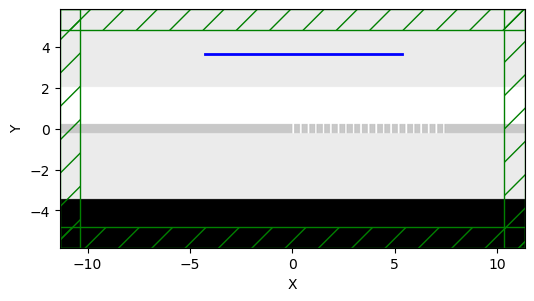

In [83]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [73]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate), until=100)
plt.close()

Meep progress: 28.203125/100.0 = 28.2% done in 4.0s, 10.2s to go
on time step 1805 (time=28.2031), 0.00221638 s/step
Meep progress: 62.8125/100.0 = 62.8% done in 8.0s, 4.7s to go
on time step 4020 (time=62.8125), 0.00180587 s/step
Meep progress: 97.171875/100.0 = 97.2% done in 12.0s, 0.3s to go
on time step 6220 (time=97.1875), 0.00181892 s/step
Normalizing field data...
run 0 finished at t = 100.0 (6400 timesteps)


In [46]:
635 / (neff - np.sin(8 * np.pi/180))

552.3583147256431